# Timelike geodesic in Schwarzschild spacetime

This Jupyter/SageMath notebook presents the numerical computation of a timelike geodesic in Schwarzschild spacetime, given an initial point and tangent vector. It uses the `integrated_geodesic` functionality introduced by Karim Van Aelst in **SageMath 8.1**, in the framework of the [SageManifolds](https://sagemanifolds.obspm.fr) project.

Click [here](https://raw.githubusercontent.com/sagemanifolds/SageManifolds/master/Worksheets/v1.3/SM_simple_goed_Schwarz.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath within the Jupyter notebook, via the command `sage -n jupyter`

A version of SageMath at least equal to 8.2 is required to run this notebook:

In [1]:
version()

'SageMath version 8.3, Release Date: 2018-08-03'

In [2]:
%display latex  # LaTeX rendering turned on

We define first the spacetime manifold $M$ and the standard Schwarzschild-Droste coordinates on it:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
X.<t,r,th,ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:\phi')
X

Chart (M, (t, r, th, ph))

For graphical purposes, we introduce $\mathbb{R}^3$ and some coordinate map $M\to \mathbb{R}^3$:

In [4]:
R3 = Manifold(3, 'R^3', latex_name=r'\mathbb{R}^3')
X3.<x,y,z> = R3.chart()
to_R3 = M.diff_map(R3, {(X, X3): [r*sin(th)*cos(ph), 
                                  r*sin(th)*sin(ph), r*cos(th)]})
to_R3.display()

M --> R^3
   (t, r, th, ph) |--> (x, y, z) = (r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th))

Then, we define the Schwarzschild metric:

In [5]:
g = M.metric()
m = var('m'); assume(m >= 0)
g[0,0], g[1,1] = -(1-2*m/r), 1/(1-2*m/r)
g[2,2], g[3,3] = r^2, (r*sin(th))^2
g.display()

g = (2*m/r - 1) dt*dt - 1/(2*m/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

We pick an initial point and an initial tangent vector:

In [6]:
p0 = M.point((0, 8*m, pi/2, 1e-12), name='p_0')
v0 = M.tangent_space(p0)((1.297513, 0, 0, 0.0640625/m), name='v_0')
v0.display()

v_0 = 1.29751300000000 d/dt + 0.0640625000000000/m d/dph

We declare a geodesic with such initial conditions, denoting by $s$ the affine parameter (proper time), with $(s_{\rm min}, s_{\rm max})=(0, 1500\,m)$:

In [7]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 1500), v0); geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

We ask for the numerical integration of the geodesic, providing some numerical value for the parameter $m$, and then plot it in terms of the Cartesian chart `X3` of $\mathbb{R}^3$:

In [8]:
sol = geod.solve(parameters_values={m: 1})  # numerical integration
interp = geod.interpolate()                 # interpolation of the solution for the plot
graph = geod.plot_integrated(chart=X3, mapping=to_R3, plot_points=500, 
                             thickness=2, label_axes=False)           # the geodesic
graph += p0.plot(chart=X3, mapping=to_R3, size=4, parameters={m: 1}) # the starting point
graph += sphere(size=2, color='grey')                                 # the event horizon
show(graph, viewer='threejs', online=True)

Graphics3d Object

A Tachyon view of the geodesic:

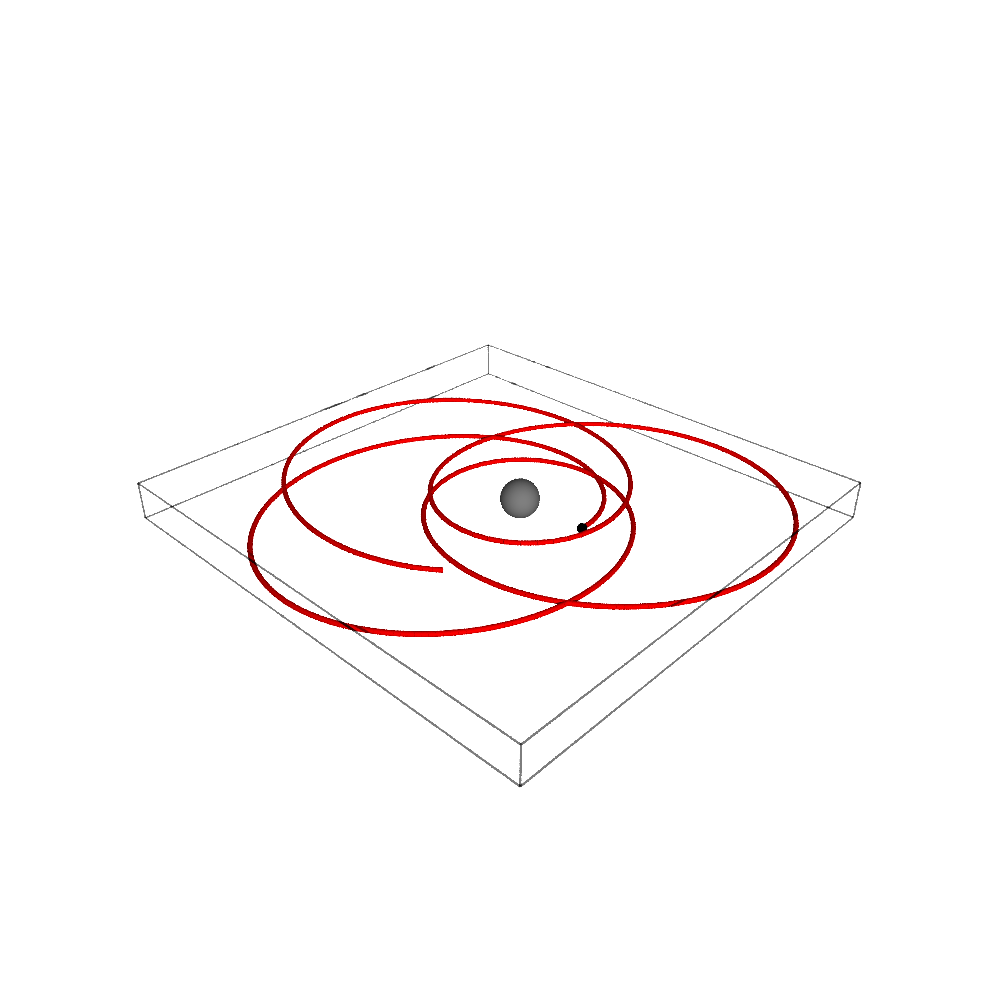

In [9]:
show(graph, viewer='tachyon', aspect_ratio=1, figsize=10)

Some details about the system solved to get the geodesic:

In [10]:
geod.system(verbose=True)

Geodesic in the 4-dimensional Lorentzian manifold M equipped with Lorentzian metric g on the 4-dimensional Lorentzian manifold M, and integrated over the Real interval (0, 1500) as a solution to the following geodesic equations, written with respect to Chart (M, (t, r, th, ph)):

Initial point: Point p_0 on the 4-dimensional Lorentzian manifold M with coordinates [0, 8*m, 1/2*pi, 1.00000000000000e-12] with respect to Chart (M, (t, r, th, ph))
Initial tangent vector: Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M with components [1.29751300000000, 0, 0, 0.0640625000000000/m] with respect to Chart (M, (t, r, th, ph))

d(t)/ds = Dt
d(r)/ds = Dr
d(th)/ds = Dth
d(ph)/ds = Dph
d(Dt)/ds = 2*Dr*Dt*m/(2*m*r - r^2)
d(Dr)/ds = -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4)
d(Dth)/ds = (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r
d(Dph)/ds = -2*(Dph*Dth*

[[2*Dr*Dt*m/(2*m*r - r^2),
  -(4*Dth^2*m^2*r^3 - 4*Dth^2*m*r^4 + Dth^2*r^5 - 4*Dt^2*m^3 + 4*Dt^2*m^2*r + (Dr^2 - Dt^2)*m*r^2 + (4*Dph^2*m^2*r^3 - 4*Dph^2*m*r^4 + Dph^2*r^5)*sin(th)^2)/(2*m*r^3 - r^4),
  (Dph^2*r*cos(th)*sin(th) - 2*Dr*Dth)/r,
  -2*(Dph*Dth*r*cos(th) + Dph*Dr*sin(th))/(r*sin(th))],
 Tangent vector v_0 at Point p_0 on the 4-dimensional Lorentzian manifold M,
 Chart (M, (t, r, th, ph))]

We recognize in the above list the Christoffel symbols of the metric $g$:

In [11]:
g.christoffel_symbols_display()

Gam^t_t,r = -m/(2*m*r - r^2) 
Gam^r_t,t = -(2*m^2 - m*r)/r^3 
Gam^r_r,r = m/(2*m*r - r^2) 
Gam^r_th,th = 2*m - r 
Gam^r_ph,ph = (2*m - r)*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

In [12]:
g.riemann().display_comp()

Riem(g)^t_r,t,r = -2*m/(2*m*r^2 - r^3) 
Riem(g)^t_r,r,t = 2*m/(2*m*r^2 - r^3) 
Riem(g)^t_th,t,th = -m/r 
Riem(g)^t_th,th,t = m/r 
Riem(g)^t_ph,t,ph = -m*sin(th)^2/r 
Riem(g)^t_ph,ph,t = m*sin(th)^2/r 
Riem(g)^r_t,t,r = -2*(2*m^2 - m*r)/r^4 
Riem(g)^r_t,r,t = 2*(2*m^2 - m*r)/r^4 
Riem(g)^r_th,r,th = -m/r 
Riem(g)^r_th,th,r = m/r 
Riem(g)^r_ph,r,ph = -m*sin(th)^2/r 
Riem(g)^r_ph,ph,r = m*sin(th)^2/r 
Riem(g)^th_t,t,th = (2*m^2 - m*r)/r^4 
Riem(g)^th_t,th,t = -(2*m^2 - m*r)/r^4 
Riem(g)^th_r,r,th = -m/(2*m*r^2 - r^3) 
Riem(g)^th_r,th,r = m/(2*m*r^2 - r^3) 
Riem(g)^th_ph,th,ph = 2*m*sin(th)^2/r 
Riem(g)^th_ph,ph,th = -2*m*sin(th)^2/r 
Riem(g)^ph_t,t,ph = (2*m^2 - m*r)/r^4 
Riem(g)^ph_t,ph,t = -(2*m^2 - m*r)/r^4 
Riem(g)^ph_r,r,ph = -m/(2*m*r^2 - r^3) 
Riem(g)^ph_r,ph,r = m/(2*m*r^2 - r^3) 
Riem(g)^ph_th,th,ph = -2*m/r 
Riem(g)^ph_th,ph,th = 2*m/r